In [42]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
files = glob.glob('../data/raw/archive/*.csv')
datasets = {f.split('/')[-1][:-4].replace('olist_', '').replace('_dataset', ''): pd.read_csv(f) for f in files}
print(datasets.keys())

dict_keys(['sellers', 'product_category_name_translation', 'orders', 'order_items', 'customers', 'geolocation', 'order_payments', 'order_reviews', 'products'])


In [30]:
print(datasets['customers']['customer_id'].nunique())
print(datasets['customers']['customer_unique_id'].nunique())
print(datasets['customers'].shape)
print(datasets['orders']['customer_id'].nunique())
print(datasets['orders'].shape)

99441
96096
(99441, 5)
99441
(99441, 8)


In [38]:
customers_orders = pd.merge(datasets['orders'], datasets['customers'], 
                            left_on=['customer_id'], right_on=['customer_id'], how='inner')
customers_orders.sort_values(['customer_unique_id'])
num_orders = {}
for customer in customers_orders['customer_unique_id'].unique():
    orders = customers_orders.loc[customers_orders['customer_unique_id'] == customer]
    if orders.shape[0] not in num_orders:
        num_orders[orders.shape[0]] = orders.shape[0]
    else:
        num_orders[orders.shape[0]] += orders.shape[0]

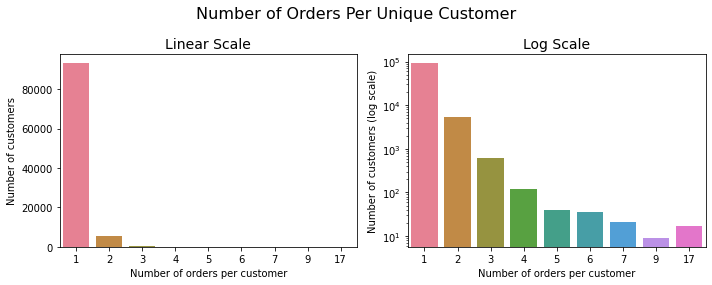

In [82]:
colors = sns.color_palette('husl', 9)
nums = list(sorted(num_orders.keys()))
vals = [num_orders[v] for v in nums]

fig, ax = plt.subplots(1, 2)
fig.set_size_inches(10, 4)
g = sns.barplot(x=nums, y=vals, palette=colors, ax=ax[0])
g_log = sns.barplot(x=nums, y=vals, palette=colors, ax=ax[1])
g_log.set_yscale("log")

g.set_xlabel('Number of orders per customer')
g.set_ylabel('Number of customers')
g.set_title('Linear Scale', fontsize=14)
g_log.set_xlabel('Number of orders per customer')
g_log.set_ylabel('Number of customers (log scale)')
g_log.set_title('Log Scale', fontsize=14)
plt.suptitle('Number of Orders Per Unique Customer', fontsize=16)
plt.tight_layout()